In [1]:
%config IPCompleter.greedy=True

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn.utils import shuffle

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#set debug
from IPython.core.debugger import set_trace

def one_hot_encode(labels):
    n_labels=len(labels)
    #set_trace() #debug
    n_unique_labels=len(np.unique(labels))
    one_hot_encode =np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels]=1
    return one_hot_encode
def read_DataSet(fileName):
    df = pd.read_csv(fileName)
    #last column is label
    rows,cols = df.shape
    X = df[df.columns[0:cols-1]].values
    Y = df[df.columns[cols-1]]
    encoder = LabelEncoder()
    encoder.fit(Y)
    Y = encoder.transform(Y)
    coded_Y = one_hot_encode(Y)
    
    print(X.shape)
    return (X,coded_Y)

In [10]:
dataFile="sonar.all-data.csv"

In [11]:
X,Y=read_DataSet(dataFile);

(207, 60)


In [12]:
X,Y = shuffle(X,Y,random_state=1)

In [13]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2, random_state=200)

In [14]:
print("training set x shape",(train_x.shape))
print("training set y shape",train_y.shape)
print("testing set x shape", test_x.shape)

training set x shape (165, 60)
training set y shape (165, 2)
testing set x shape (42, 60)


In [15]:
learning_rate=0.3
training_epoches=10
cost_history=np.empty(shape=[1], dtype=float)
n_dim=X.shape[1]
print ("dimension {0}".format(n_dim))
n_class=2
model_path="NMI.dat"

dimension 60


In [16]:
#define number of hidden layer
n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60

In [17]:
#define the input parameters with column vector n_dim as dimesion
x = tf.placeholder(tf.float32, [None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_dim]))
real_y = tf.placeholder(tf.float32, [None,n_class])

In [18]:
#define the Model
def multilayer_perceptron ( x,weights, biases):
    #Hidden layer with RELU activation
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden layer with sigmoid activation
    layer_2 = tf.add(    tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)

    #Hidden layer with sigmoid activation
    layer_3 = tf.add(    tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    #Hidden layer with sigmoid activation
    layer_4 = tf.add(    tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #output layer with linear activation
    out_layer = tf.matmul(layer_4,weights['out'])+biases['out']
    
    return out_layer
    

In [19]:
weights={
    'h1':tf.Variable(    tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(    tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(    tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(    tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(    tf.truncated_normal([n_hidden_4,n_class]))
}
biases = {
    'b1':tf.Variable(    tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(    tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(    tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(    tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(    tf.truncated_normal([n_class]))
}

In [20]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [21]:
predicted_y = multilayer_perceptron(x,weights,biases)

In [22]:
#implementation the linear lost function: SUM( real_y - predicted_y{activatefunc(linear weight dot product + bias)})/N
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predicted_y, labels=real_y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [23]:
mse_history=[]
accuracy_history=[]

In [24]:
#sess = tf.Session()
#sess.run(init)

In [25]:
#sess.run(training_step,feed_dict={x:train_x,real_y:train_y})

In [26]:
#r=sess.run(tf.argmax(predicted_y,1),feed_dict={x:train_x,real_y:train_y})

In [27]:
#r=sess.run(tf.argmax(real_y,1),feed_dict={x:train_x,real_y:train_y})
#sess.close()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epoches):
        sess.run(training_step,feed_dict={x:train_x,real_y:train_y})
        cost = sess.run(cost_function,feed_dict={x:train_x,real_y:train_y})
        cost_history = np.append(cost_history,cost)
        correct_prediction = tf.equal(tf.argmax(predicted_y,1),tf.argmax(real_y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        
        pred_y = sess.run(predicted_y, feed_dict={x:test_x})
        mse = tf.reduce_mean(tf.square(pred_y-test_y))
        mse_ = sess.run(mse)
        mse_history.append(mse_)
        accuracy = (sess.run(accuracy,feed_dict={x:train_x,real_y:train_y}))
        accuracy_history.append(accuracy)
        print ("epoch: {0} - cost: {1} - MSE: {2} - Train Accuracy: {3}".format(epoch,cost,mse_,accuracy))
    save_path = saver.save(sess,model_path)
    print("Saved model in file {0}".format(save_path))
    
    #Print the final accuracy
    test_correct_prediction =tf.equal(tf.argmax(pred_y,1),tf.argmax(test_y,1))
    test_accuracy = tf.reduce_mean(tf.cast(test_correct_prediction,tf.float32))
    print("Test accuracy:{0}",(sess.run(test_accuracy,feed_dict={x:train_x,real_y:train_y})))
    mse = tf.reduce_mean(tf.square(pred_y-test_y))
    print ("MSE : {0}".format(mse))
    

epoch: 0 - cost: 164.13986206054688 - MSE: 28753.145616311853 - Train Accuracy: 0.5151515007019043
epoch: 1 - cost: 38.001983642578125 - MSE: 1402.480757762259 - Train Accuracy: 0.4848484992980957
epoch: 2 - cost: 2.768771171569824 - MSE: 12.739660920563903 - Train Accuracy: 0.5151515007019043
epoch: 3 - cost: 5.288200378417969 - MSE: 27.60808261544942 - Train Accuracy: 0.4848484992980957
epoch: 4 - cost: 0.7967602610588074 - MSE: 1.643141145895528 - Train Accuracy: 0.4848484992980957
epoch: 5 - cost: 0.7627052664756775 - MSE: 1.719635074229655 - Train Accuracy: 0.4848484992980957
epoch: 6 - cost: 0.7127414345741272 - MSE: 1.3259868629376403 - Train Accuracy: 0.4848484992980957
epoch: 7 - cost: 0.6945964097976685 - MSE: 1.0270374753888663 - Train Accuracy: 0.5090909004211426
epoch: 8 - cost: 0.6937589645385742 - MSE: 0.9743070629023691 - Train Accuracy: 0.5151515007019043
epoch: 9 - cost: 0.6936734914779663 - MSE: 0.9718790638662973 - Train Accuracy: 0.5151515007019043
Saved model in f

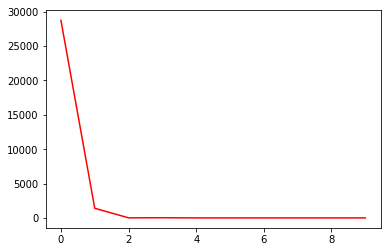

In [29]:
plt.plot(mse_history,'r')

plt.savefig('mse_history.png')
plt.show()

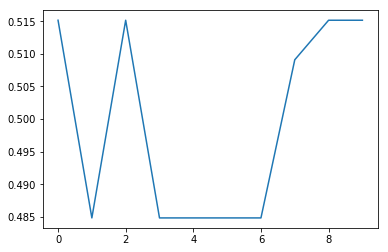

In [30]:
plt.plot(accuracy_history)
plt.savefig('accuracy_history.png')
plt.show()

In [31]:
#reload the saved model and run testing
init = tf.global_variables_initializer()
saver = tf.train.Saver()
sess = tf.Session()
sess.run(init)
saver.restore(sess,"./NMI.dat")

#with tf.Session() as session:
prediction = tf.argmax(predicted_y,1)
correction_prediction = tf.equal(prediction, tf.argmax(real_y,1))
print("0 stands for M")
for i in range(93,101):
        prediction_run = sess.run(prediction,feed_dict={x:X[i].reshape(1,60)})
        accruacy_run=sess.run(correction_prediction,feed_dict={x:X[i].reshape(1,60), real_y:Y[i].reshape(1,2)})
        print("Original class:{0}, Predicted values:{1}".format(np.argmax(Y[i]),prediction_run))

0 stands for M
Original class:1, Predicted values:[0]
Original class:0, Predicted values:[0]
Original class:0, Predicted values:[0]
Original class:1, Predicted values:[0]
Original class:0, Predicted values:[0]
Original class:1, Predicted values:[1]
Original class:0, Predicted values:[0]
Original class:0, Predicted values:[0]


In [32]:
np.argmax(Y[93])

1